# Predictions of revenue using IMDb and TMDb datasets
Oct 23, 2019

<img src="./movies1.gif" height="100%">

## Outline
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preprocess">Preprocessing</a></li>
<li><a href="#selection">Best features selection</a></li>
<li><a href="#ML">ML</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

## 1. Introduction

In our work we use datasets from IMDB (Internet Movie DataBase) and TMDB (The Movie DataBase). First contains trustful customer's ratings and second contains informations about movies' directors, actors, revenues, etc. Our main goal is to find features that have bigger influence on revenue. And built a model based on these features to estimate the revenue. Because income of the movie's production is the most important characteristic for producers.

> ### What features of a movie generate higher revenue?
> <b>1.</b> From our hypothesis we assume that budget should correlate with revenue: the higher the income the greater outcome. We will prove our statement further.
<br>
<br>
> <b>2.</b> Top actors should play a big role in the final revenue. Let's divide all movies by actors and we will see there influence on the final box office, because more people would watch it.
<br>
<br>
> <b>3.</b> Often people watch movies which have a high rating at the Internet. Let's consider the dependence of the revenue from the film rating in this dataset.

> <b>4.</b> Director also influence on the final revenue. Let's divide all movies by directors and we will see there impact on the final box office.
<br>
<br>
> <b>5.</b> May be genres also play a big role in the final revenue. Let's see wich genre will affect more: comedy or horror?
<br>
<br>
> <b>6.</b> Elborate on the data to see which key features we can find which have a big correlation with movies outcome to be able to predict future revenue.

Note: budget_adj and revenue_adj include inflation, so for the future analisys we will use these features

In [1]:
# Imports of useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [2]:
# Data reading 

data_imdb = pd.read_csv("data.tsv", sep="\t", index_col=None)
data_tmdb = pd.read_csv("tmdb_5000_movies.csv")
data_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# The average number of votes in TMDB dataset is much lower than in IMDB dataset, thus we will 
# merge these two datasets and obtain more relaible data

data_imdb = data_imdb.rename(columns={'tconst': 'imdb_id'})
data = pd.merge(data_imdb, data_tmdb, on='imdb_id')
data = data.drop(['vote_count','vote_average'], axis = 1)

In [4]:
data.head()

,imdb_id,averageRating,numVotes,id,popularity,budget,revenue,original_title,cast,homepage,...,tagline,keywords,overview,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,tt0035423,6.4,75099,11232,0.883228,0,0,Kate & Leopold,Meg Ryan|Hugh Jackman|Liev Schreiber|Breckin M...,NaN,...,If they lived in the same century they'd be pe...,lover (female)|love of one's life|time travel|...,When her scientist ex-boyfriend discovers a po...,118,Comedy|Fantasy|Romance|Science Fiction,Miramax Films|Konrad Pictures,12/25/01,2001,0.000000e+00,0.000000e+00
1,tt0052646,4.4,5734,33468,0.215748,62000,0,The Brain That Wouldn't Die,Jason Evers|Virginia Leith|Doris Brent|Audrey ...,NaN,...,Alive... without a body... fed by an unspeakab...,transplantation|experiment|mutant|brain|fiancÃ©,Dr. Bill Cortner (Jason Evers) and his fiancÃ©...,82,Horror|Science Fiction,Rex Carlton Productions,2/25/62,1962,4.469238e+05,0.000000e+00
2,tt0053559,6.1,4812,29756,0.110511,0,0,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,NaN,...,IT'S FUN TO BE SCARED BY 13 GHOSTS,haunted house,Reclusive Dr. Zorba has died and left his mans...,85,Horror,Columbia Pictures|William Castle Productions,8/5/60,1960,0.000000e+00,0.000000e+00
3,tt0053580,6.9,13405,11209,0.310398,0,0,The Alamo,John Wayne|Richard Widmark|Laurence Harvey|Fra...,NaN,...,The Mission That Became a Fortress! The Fortre...,texas|assault|alamo|mexican|mexican army,The legendary true story of a small band of so...,167,Action|Adventure|Drama|History|Western,United Artists|Batjac Productions|The Alamo Co...,10/24/60,1960,0.000000e+00,0.000000e+00
4,tt0053604,8.3,148239,284,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,NaN,...,"Movie-wise, there has never been anything like...",new york|new year's eve|lovesickness|age diffe...,Bud Baxter is a minor clerk in a huge New York...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,1960,2.211890e+07,1.843242e+08


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10853 entries, 0 to 10852
Data columns (total 21 columns):
imdb_id                 10853 non-null object
averageRating           10853 non-null float64
numVotes                10853 non-null int64
id                      10853 non-null int64
popularity              10853 non-null float64
budget                  10853 non-null int64
revenue                 10853 non-null int64
original_title          10853 non-null object
cast                    10777 non-null object
homepage                2933 non-null object
director                10813 non-null object
tagline                 8037 non-null object
keywords                9367 non-null object
overview                10850 non-null object
runtime                 10853 non-null int64
genres                  10832 non-null object
production_companies    9828 non-null object
release_date            10853 non-null object
release_year            10853 non-null int64
budget_adj              1

In [6]:
# Below shows significant amount of missing values. 

print('Count of missing values(zeros) in budget_adj colm')
data[data['budget_adj'] == 0].count()

Count of missing values(zeros) in budget_adj colm


imdb_id                 5685
averageRating           5685
numVotes                5685
id                      5685
popularity              5685
budget                  5685
revenue                 5685
original_title          5685
cast                    5620
homepage                1227
director                5649
tagline                 3485
keywords                4530
overview                5682
runtime                 5685
genres                  5665
production_companies    4795
release_date            5685
release_year            5685
budget_adj              5685
revenue_adj             5685
dtype: int64

In [7]:
print('Count of missing values(zeros) in revenue_adj colm')
data[data['revenue_adj'] == 0].count()

Count of missing values(zeros) in revenue_adj colm


imdb_id                 6004
averageRating           6004
numVotes                6004
id                      6004
popularity              6004
budget                  6004
revenue                 6004
original_title          6004
cast                    5933
homepage                1268
director                5965
tagline                 3652
keywords                4753
overview                6001
runtime                 6004
genres                  5983
production_companies    5075
release_date            6004
release_year            6004
budget_adj              6004
revenue_adj             6004
dtype: int64

In [8]:
data_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
data.isna().sum()

imdb_id                    0
averageRating              0
numVotes                   0
id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7920
director                  40
tagline                 2816
keywords                1486
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Find number duplicated values
dupl = data.duplicated().sum()
print("Number of Duplicate Values", dupl)

Number of Duplicate Values 1


## 2. Preprocessing

#### For the preprocessing we should do several things:

> <b>1.</b> There are a lot of null/nan elements in such essensial columns as budget_adj, revenue_adj, cast and genres. So we will fill missing numerical data with median of the recent data and missing categorical data with mode.
<br>
<br>
> <b>2.</b> Such columns as homepage, keywords, tagline and production companies can be dropped, because they are not important features to predict revenue and it is hard to elaborate on such data using linear regression and trees, so we could just drop them.

> <b>3.</b> Genres and cast contain values wich divided by the symbol '|'. We should somehow divide it.
<br>
<br>
> <b>4.</b> release_date should be in correct datatype.

In [11]:
# Removing budget and renvuue since revenue_adj and budget_adj is more appropriate since it considers inflation 

data.drop(['budget', 'revenue', 'homepage', 'keywords', 'tagline', 'production_companies'], axis=1, inplace=True)

In [12]:
#changing type of date
data['release_date'] = pd.to_datetime(data['release_date'])

In [13]:
data[data['revenue_adj'] == 0].revenue_adj.loc[:]

0        0.0
1        0.0
2        0.0
3        0.0
6        0.0
        ... 
10848    0.0
10849    0.0
10850    0.0
10851    0.0
10852    0.0
Name: revenue_adj, Length: 6004, dtype: float64

In [14]:
# Fill missing numerical data with median

data.loc[data['budget_adj'] == 0, 'budget_adj'] = data[data['budget_adj'] != 0].budget_adj.median()
print(data.budget_adj)

data.loc[data['revenue_adj'] == 0, 'revenue_adj'] = data[data['revenue_adj'] != 0].revenue_adj.median()
print(data.revenue_adj)

0        2.273559e+07
1        4.469238e+05
2        2.273559e+07
3        2.273559e+07
4        2.211890e+07
             ...     
10848    2.273559e+07
10849    2.273559e+07
10850    2.273559e+07
10851    2.273559e+07
10852    2.908194e+07
Name: budget_adj, Length: 10853, dtype: float64
0        4.395666e+07
1        4.395666e+07
2        4.395666e+07
3        4.395666e+07
4        1.843242e+08
             ...     
10848    4.395666e+07
10849    4.395666e+07
10850    4.395666e+07
10851    4.395666e+07
10852    4.395666e+07
Name: revenue_adj, Length: 10853, dtype: float64


In [15]:
data.head()

,imdb_id,averageRating,numVotes,id,popularity,original_title,cast,director,overview,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,tt0035423,6.4,75099,11232,0.883228,Kate & Leopold,Meg Ryan|Hugh Jackman|Liev Schreiber|Breckin M...,James Mangold,When her scientist ex-boyfriend discovers a po...,118,Comedy|Fantasy|Romance|Science Fiction,2001-12-25,2001,2.273559e+07,4.395666e+07
1,tt0052646,4.4,5734,33468,0.215748,The Brain That Wouldn't Die,Jason Evers|Virginia Leith|Doris Brent|Audrey ...,Joseph Green,Dr. Bill Cortner (Jason Evers) and his fiancÃ©...,82,Horror|Science Fiction,2062-02-25,1962,4.469238e+05,4.395666e+07
2,tt0053559,6.1,4812,29756,0.110511,13 Ghosts,Charles Herbert|Jo Morrow|Martin Milner|Rosema...,William Castle,Reclusive Dr. Zorba has died and left his mans...,85,Horror,2060-08-05,1960,2.273559e+07,4.395666e+07
3,tt0053580,6.9,13405,11209,0.310398,The Alamo,John Wayne|Richard Widmark|Laurence Harvey|Fra...,John Wayne,The legendary true story of a small band of so...,167,Action|Adventure|Drama|History|Western,2060-10-24,1960,2.273559e+07,4.395666e+07
4,tt0053604,8.3,148239,284,0.947307,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,Bud Baxter is a minor clerk in a huge New York...,125,Comedy|Drama|Romance,2060-06-15,1960,2.211890e+07,1.843242e+08


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10853 entries, 0 to 10852
Data columns (total 15 columns):
imdb_id           10853 non-null object
averageRating     10853 non-null float64
numVotes          10853 non-null int64
id                10853 non-null int64
popularity        10853 non-null float64
original_title    10853 non-null object
cast              10777 non-null object
director          10813 non-null object
overview          10850 non-null object
runtime           10853 non-null int64
genres            10832 non-null object
release_date      10853 non-null datetime64[ns]
release_year      10853 non-null int64
budget_adj        10853 non-null float64
revenue_adj       10853 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 1.3+ MB


In [17]:
data.dropna(inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10722 entries, 0 to 10852
Data columns (total 15 columns):
imdb_id           10722 non-null object
averageRating     10722 non-null float64
numVotes          10722 non-null int64
id                10722 non-null int64
popularity        10722 non-null float64
original_title    10722 non-null object
cast              10722 non-null object
director          10722 non-null object
overview          10722 non-null object
runtime           10722 non-null int64
genres            10722 non-null object
release_date      10722 non-null datetime64[ns]
release_year      10722 non-null int64
budget_adj        10722 non-null float64
revenue_adj       10722 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(6)
memory usage: 1.3+ MB


In [19]:
# Copy the dataframe so that the main dataframe remains unaffected

data_prep = data.copy(deep=True)

##### Hypothesis 1 (budget/ revenue correlation)

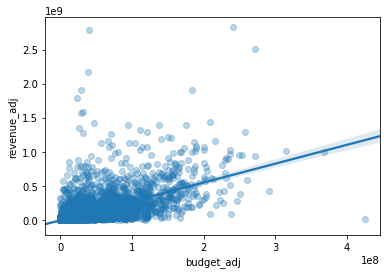

In [20]:
# Scatter plot of budget and revenue

sns.regplot(x = 'budget_adj', y = 'revenue_adj', data=data_prep, scatter_kws={'alpha':0.3});

# Show good correlation

From the grath we could observe is positive correlation between budjet and revenue:  as the budget increases the average revenue of a movie also increases.

##### Hypothesis 2 ( top actors/ revenue correlation) 

Firstly, let's devided cast in different rows to analyze each actor impact on the film revenue.

In [21]:
data_prep.cast[2]

'Charles Herbert|Jo Morrow|Martin Milner|Rosemary DeCamp|Margaret Hamilton'

There is only 5 actors in cast for each film, so we could easily devided them

In [22]:
# Copy the dataframe so that the main dataframe remains unaffected

data_prep_actors = data.copy(deep=True)

Cleaning the dataset according to requirments and only keeping those columns that are actually needed.

In [23]:
data_prep_actors.drop(data_prep_actors.columns.difference(['imdb_id', 'original_title', 'cast','revenue_adj']), 1, inplace=True)

# Splitting the various actors using the delimeter 
data_prep_actors.cast = data_prep_actors.cast.str.split('|')

Explode function will devide cast in different rows

In [24]:
def explode(data, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = data.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = data[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(data[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(data[col].values) for col in lst_cols}) \
          .loc[:, data.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(data[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(data[col].values) for col in lst_cols}) \
          .append(data.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, data.columns]

In [25]:
# Dropping null values and calling the explode function

data_prep_actors.dropna(inplace = True);
data_prep_actors = explode(data_prep_actors, ['cast'])

In [26]:
data_prep_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52294 entries, 0 to 52293
Data columns (total 4 columns):
imdb_id           52294 non-null object
original_title    52294 non-null object
cast              52294 non-null object
revenue_adj       52294 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


There are a lot of data, so let's group films by actors and consider only actors, who have starred in a lot of films.

In [27]:
top_actors = (data_prep_actors.groupby('cast')['original_title'].count()).sort_values(ascending=False)

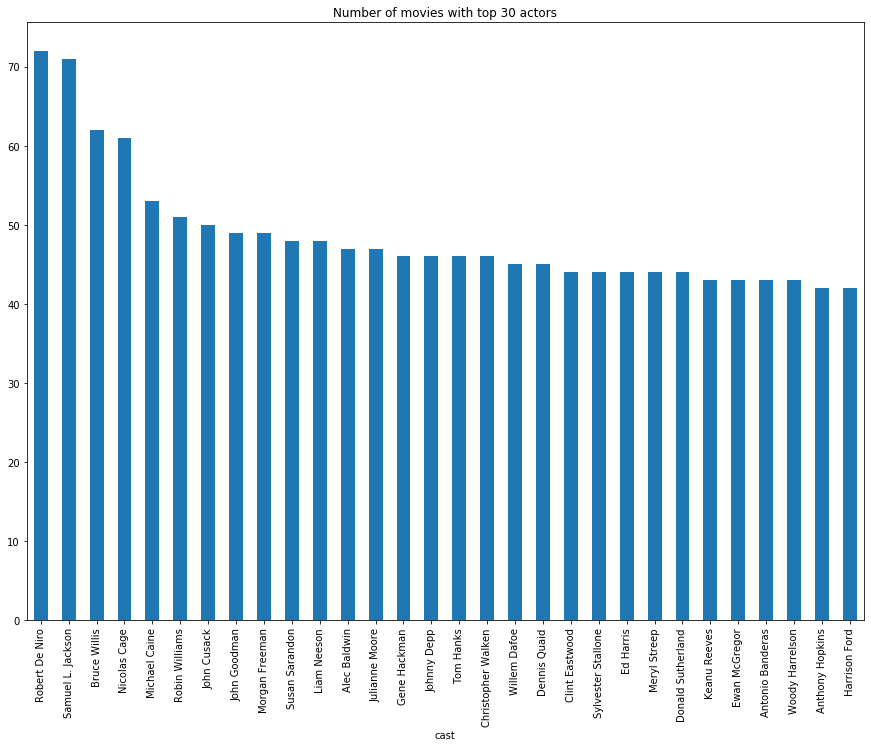

In [28]:
# List of top actors

top_actors[:30].plot(kind='bar', figsize=(15,11), title='Number of movies with top 30 actors').yaxis.label.set_visible(False)

From the grath we could observe that Robert De Niro and Samuel L. Jackson participated in more films, than other actors

In [29]:
# Now create a new dataframe which only contain the rows belonging to the movies, where only top 30 actors participated 

data_topActors = pd.DataFrame()
for actor,v in top_actors[:30].items():
    data_topActors =data_topActors.append(data_prep_actors[data_prep_actors['cast'].str.contains(actor)],ignore_index=True)

In [30]:
data_topActors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 4 columns):
imdb_id           1458 non-null object
original_title    1458 non-null object
cast              1458 non-null object
revenue_adj       1458 non-null float64
dtypes: float64(1), object(3)
memory usage: 45.7+ KB


In [31]:
# Take the mean of the revenue produced by all the movies, where each actor participated

data_topActorsRevenue = data_topActors.groupby(['cast']).mean()

In [32]:
# Extract the relavent coloumns needed for plotting

data_topActorsRevenue =data_topActorsRevenue.drop(data_topActorsRevenue.columns.difference(['cast','revenue_adj']), 1)

In [33]:
# Sort the revenue coloumn in descending order

data_topActorsRevenue = data_topActorsRevenue.sort_values(by = 'revenue_adj', ascending=1)

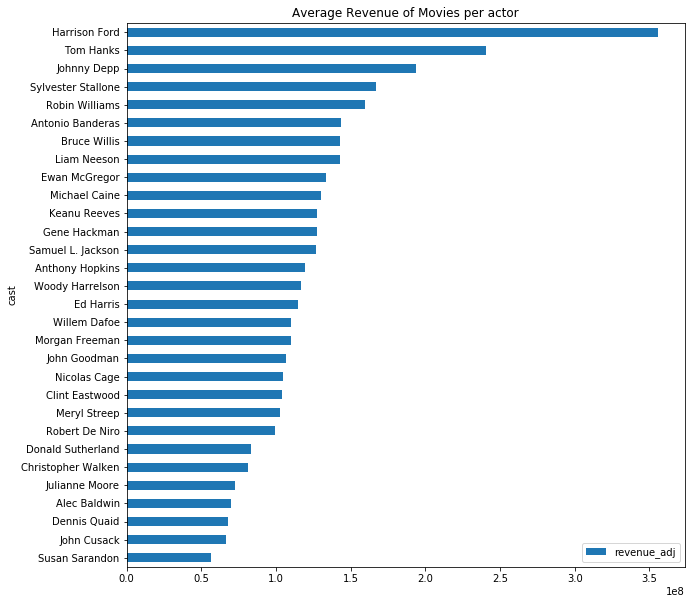

In [34]:
data_topActorsRevenue.plot(kind='barh', figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per actor' )

From the grath we observe that Harrison Ford is the actor with the higherst revenue. Let's see how revenue distribute by movies, where he participated.

In [35]:
# Extract rows containing movies, where Harrison Ford has participated

Harrison_Ford=data_topActors[data_topActors['cast'].str.contains('Harrison Ford')].sort_values(by='revenue_adj', ascending=0)

In [36]:
Harrison_Ford

,imdb_id,original_title,cast,revenue_adj
1417,tt0076759,Star Wars,Harrison Ford,2.789712e+09
1457,tt2488496,Star Wars: The Force Awakens,Harrison Ford,1.902723e+09
1421,tt0080684,The Empire Strikes Back,Harrison Ford,1.424626e+09
1424,tt0086190,Return of the Jedi,Harrison Ford,1.253819e+09
1422,tt0082971,Raiders of the Lost Ark,Harrison Ford,9.351169e+08
1430,tt0097576,Indiana Jones and the Last Crusade,Harrison Ford,8.340611e+08
1445,tt0367882,Indiana Jones and the Kingdom of the Crystal S...,Harrison Ford,7.966945e+08
1425,tt0087469,Indiana Jones and the Temple of Doom,Harrison Ford,6.989810e+08
1434,tt0106977,The Fugitive,Harrison Ford,5.568069e+08
1437,tt0118571,Air Force One,Harrison Ford,4.281275e+08


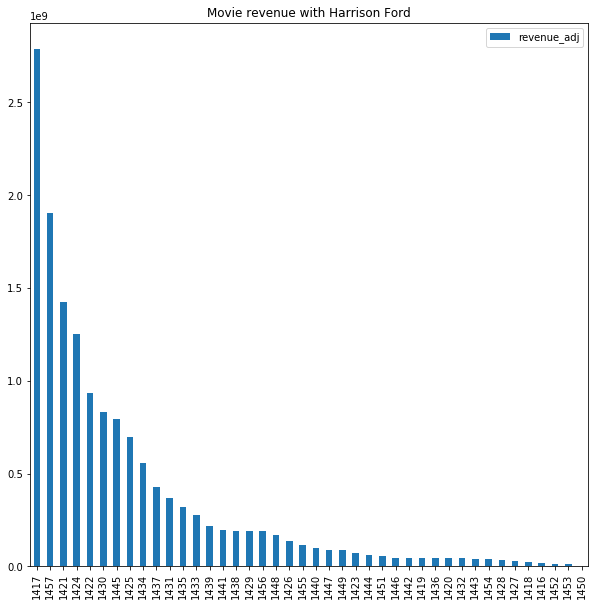

In [37]:
Harrison_Ford[['revenue_adj']].plot(kind='bar', figsize=(10, 10), sort_columns='True', title='Movie revenue with Harrison Ford');

From this grath we could see that we can’t say that films with popular actors will have a big box office. Here we could observe that while some movies did produced a marked high revenue well above the global mean revenue, there were significant other movies that did not perform as well.

##### Hypothesis 3 ( rating/ revenue correlation)

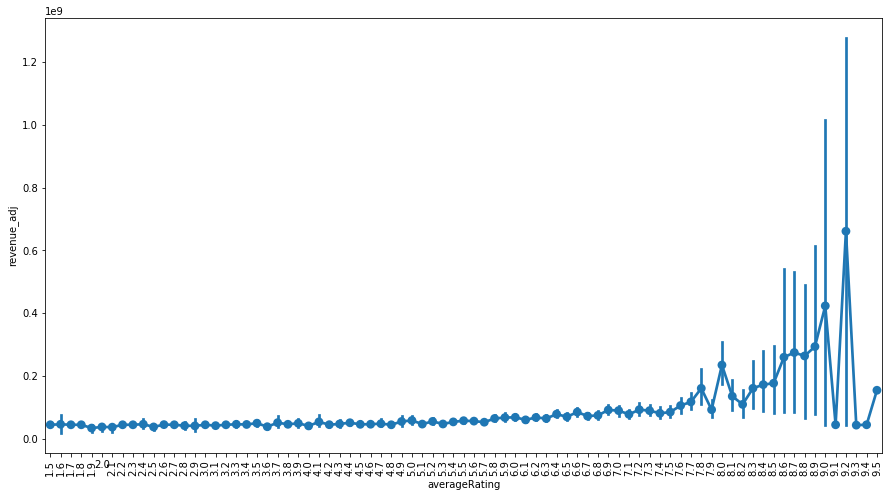

In [38]:
plt.figure(figsize=(15,8))
locs, labels = plt.xticks()
plt.xticks(locs[1:], rotation='vertical')
sns.pointplot(x = 'averageRating', y = 'revenue_adj', data=data_prep)

We could observe some correlation between rating and revenue: higher the rating, higer the revenue

##### Hypothesis 4 ( director/ revenue correlation)

Let's make the same analyze as for an actors, because it is fully describes the situation. 

In [39]:
# Copy the dataframe so that the main dataframe remains unaffected

data_prep_directors = data.copy(deep=True)

Cleaning the dataset according to requirments and only keeping those columns that are actually needed.

In [40]:
data_prep_directors.drop(data_prep_directors.columns.difference(['imdb_id', 'original_title', 'director','revenue_adj']), 1, inplace=True)

# Splitting the various genres using the delimeter 
data_prep_directors.director = data_prep_directors.director.str.split('|')

In [41]:
data_prep_directors = explode(data_prep_directors, ['director'])

Let's group films by directors and consider only directors, who directed a greater number of movies.

In [42]:
top_directors = (data_prep_directors.groupby('director')['original_title'].count()).sort_values(ascending=False)

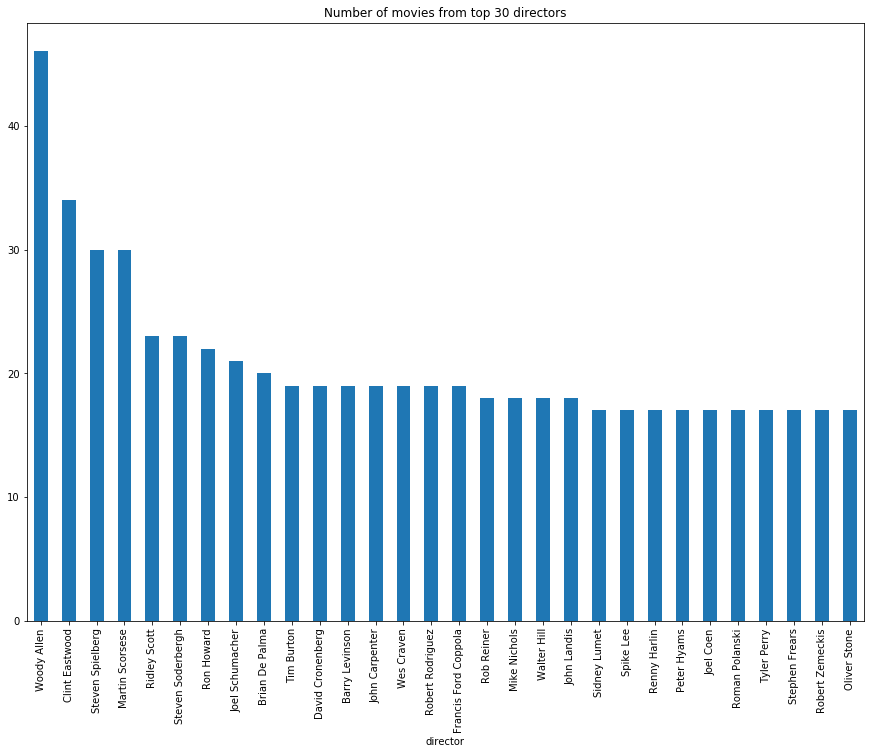

In [43]:
# List of top directors

top_directors[:30].plot(kind='bar', figsize=(15,11), title='Number of movies from top 30 directors').yaxis.label.set_visible(False)

From the grath we could observe that WoodyAllen and Clint Eastwood directed more films, than others

In [44]:
# Now create a new dataframe which only contain the rows belonging to the movies, where only top 30 actors participated 

data_topDirectors = pd.DataFrame()
for director,v in top_directors[:30].items():
    data_topDirectors =data_topDirectors.append(data_prep_directors[data_prep_directors['director'].str.contains(director)],ignore_index=True)

In [45]:
data_topDirectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
imdb_id           624 non-null object
original_title    624 non-null object
director          624 non-null object
revenue_adj       624 non-null float64
dtypes: float64(1), object(3)
memory usage: 19.6+ KB


In [46]:
data_topDirectors.head(30)

,imdb_id,original_title,director,revenue_adj
0,tt0061177,"What's Up, Tiger Lily?",Woody Allen,4.395666e+07
1,tt0065063,Take the Money and Run,Woody Allen,4.395666e+07
2,tt0066808,Bananas,Woody Allen,4.395666e+07
3,tt0068555,Everything You Always Wanted to Know About Sex...,Woody Allen,9.394704e+07
4,tt0070707,Sleeper,Woody Allen,9.009389e+07
5,tt0073312,Love and Death,Woody Allen,4.395666e+07
6,tt0075686,Annie Hall,Woody Allen,1.376203e+08
7,tt0077742,Interiors,Woody Allen,4.395666e+07
8,tt0079522,Manhattan,Woody Allen,1.200223e+08
9,tt0081554,Stardust Memories,Woody Allen,2.748968e+07


In [47]:
# Take the mean of the revenue produced by all the movies, which each director directed

data_topDirectorsRevenue = data_topDirectors.groupby(['director']).mean()

In [48]:
# Extract the relavent coloumns needed for plotting

data_topDirectorsRevenue = data_topDirectorsRevenue.drop(data_topDirectorsRevenue.columns.difference(['director','revenue_adj']), 1)

In [49]:
# Sort the revenue coloumn in descending order

data_topDirectorsRevenue = data_topDirectorsRevenue.sort_values(by = 'revenue_adj', ascending=1)

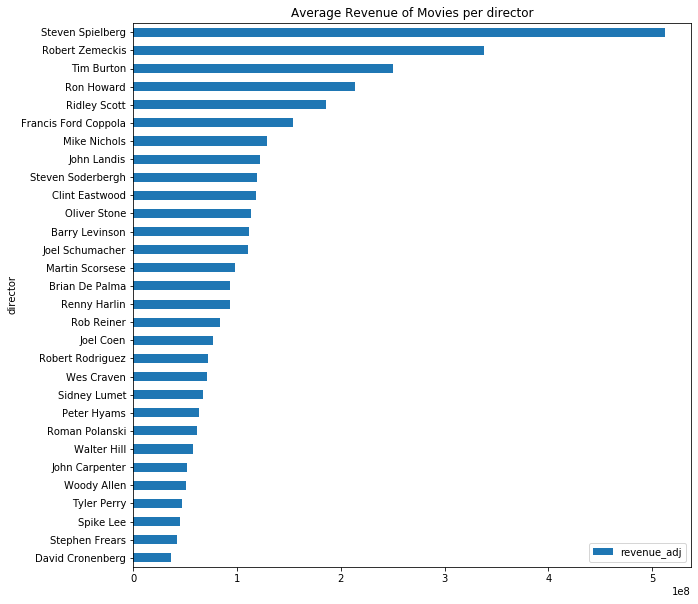

In [50]:
data_topDirectorsRevenue.plot(kind='barh', figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per director' )

From the grath we observe that Steven Spielberg is the director with the higherst revenue.

In [51]:
# Extract rows containing movies, where Harrison Ford has participated

Steven_Spielberg=data_topDirectors[data_topDirectors['director'].str.contains('Steven Spielberg')].sort_values(by='revenue_adj', ascending=0)

In [52]:
Steven_Spielberg

,imdb_id,original_title,director,revenue_adj
82,tt0073195,Jaws,Steven Spielberg,1.907006e+09
86,tt0083866,E.T. the Extra-Terrestrial,Steven Spielberg,1.791694e+09
94,tt0107290,Jurassic Park,Steven Spielberg,1.388863e+09
83,tt0075860,Close Encounters of the Third Kind,Steven Spielberg,1.092965e+09
85,tt0082971,Raiders of the Lost Ark,Steven Spielberg,9.351169e+08
92,tt0097576,Indiana Jones and the Last Crusade,Steven Spielberg,8.340611e+08
103,tt0367882,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,7.966945e+08
88,tt0087469,Indiana Jones and the Temple of Doom,Steven Spielberg,6.989810e+08
104,tt0407304,War of the Worlds,Steven Spielberg,6.607145e+08
98,tt0120815,Saving Private Ryan,Steven Spielberg,6.445564e+08


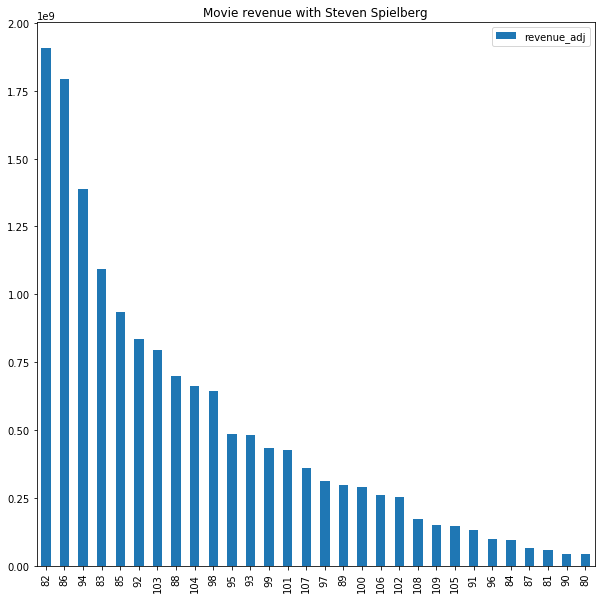

In [53]:
Steven_Spielberg[['revenue_adj']].plot(kind='bar', figsize=(10, 10), sort_columns='True', title='Movie revenue with Steven Spielberg')

From this graph we could see that we can’t say that movies created by popular directors will have a big box office. Here we could observe that while some movies produced a marked high revenue well above the global mean revenue, there were significant other movies that did not perform as well.

##### Hypothesis 5 ( genres/ revenue correlation)

In [54]:
# Copy the dataframe so that the main dataframe remains unaffected

data_prep_genres = data.copy(deep=True)

In [55]:
data_prep_genres.drop(data_prep_genres.columns.difference(['imdb_id', 'original_title', 'genres','revenue_adj']), 1, inplace=True)

# Splitting the various genres using the delimeter 
data_prep_genres.genres = data_prep_genres.genres.str.split('|')

In [56]:
data_prep_genres = explode(data_prep_genres, ['genres'])

In [57]:
top_genres = (data_prep_genres.groupby('genres')['original_title'].count()).sort_values(ascending=False)

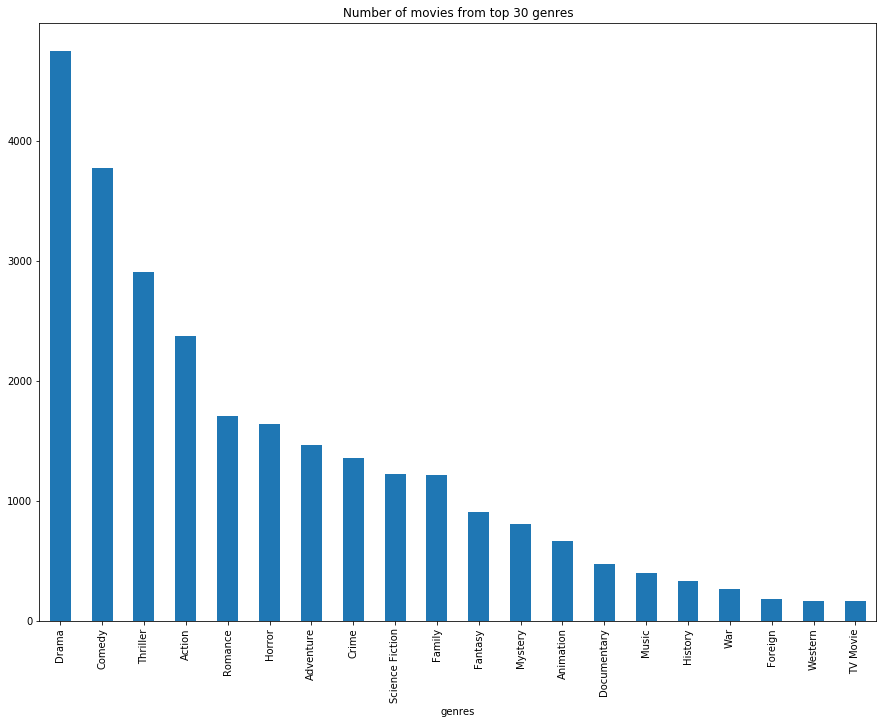

In [58]:
# List of top genres

top_genres[:30].plot(kind='bar', figsize=(15,11), title='Number of movies from top 30 genres').yaxis.label.set_visible(False)

There are a lot of drama and comedy films!

In [59]:
# Now create a new dataframe which only contain the rows belonging to the movies with only top 30 genres

data_topGenres = pd.DataFrame()
for genre,v in top_genres[:30].items():
    data_topGenres =data_topGenres.append(data_prep_genres[data_prep_genres['genres'].str.contains(genre)],ignore_index=True)

In [60]:
# Take the mean of the revenue produced by all the movies with each genre

data_topGenresRevenue = data_topGenres.groupby(['genres']).mean()

In [61]:
# Extract the relavent coloumns needed for plotting

data_topGenresRevenue = data_topGenresRevenue.drop(data_topGenresRevenue.columns.difference(['genres','revenue_adj']), 1)

In [62]:
# Sort the revenue coloumn in descending order

data_topGenresRevenue = data_topGenresRevenue.sort_values(by = 'revenue_adj', ascending=1)

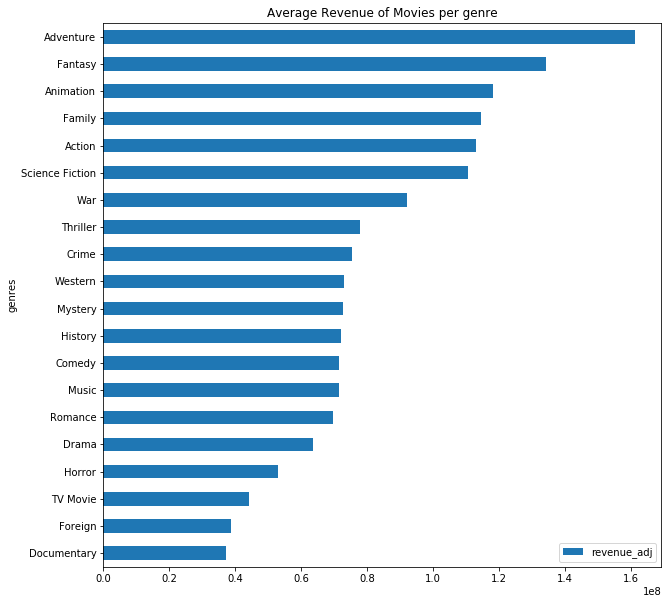

In [63]:
data_topGenresRevenue.plot(kind='barh', figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per genre' )

Adventure movies are more profitable

In [64]:
# Extract rows containing movies, where Harrison Ford has participated
Adventure=data_topGenres[data_topGenres['genres'].str.contains('Adventure')].sort_values(by='revenue_adj', ascending=0)

In [65]:
Adventure

,imdb_id,original_title,genres,revenue_adj
18108,tt0499549,Avatar,Adventure,2.827124e+09
17254,tt0076759,Star Wars,Adventure,2.789712e+09
17230,tt0073195,Jaws,Adventure,1.907006e+09
18519,tt2488496,Star Wars: The Force Awakens,Adventure,1.902723e+09
17303,tt0083866,E.T. the Extra-Terrestrial,Adventure,1.791694e+09
...,...,...,...,...
17456,tt0099810,The Hunt for Red October,Adventure,3.337797e+02
17884,tt0328880,Brother Bear,Adventure,2.963382e+02
17484,tt0103060,Teenage Mutant Ninja Turtles II: The Secret of...,Adventure,1.248852e+02
17533,tt0108308,Teenage Mutant Ninja Turtles III,Adventure,6.339774e+01


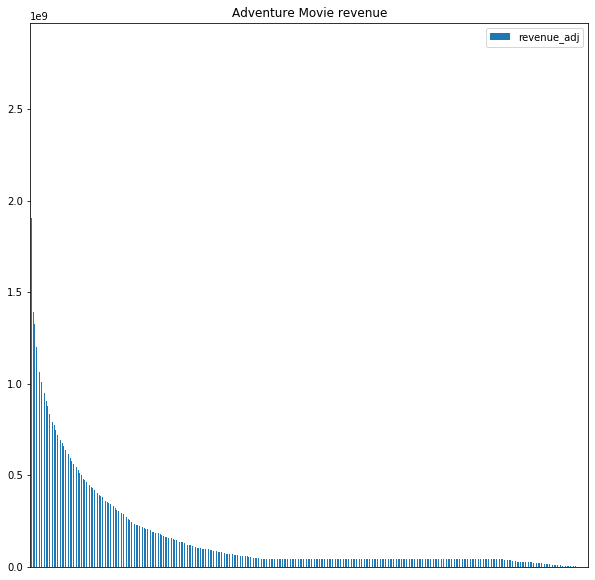

In [66]:
Adventure[['revenue_adj']].plot(kind='bar', figsize=(10, 10), sort_columns='True', title='Adventure Movie revenue')
#plt.axis('off')
plt.xticks([])
plt.show()

The same conclusion as for actors and directors: no correlation with revenue

## 3. Select Best Features

### Pearson

Let's search for the pairwise correlation of all columns in the dataframe. So we might find for the features that have strong correlation with revenue. We are using Pearson method because it shows linear relationship.

In [67]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,averageRating,numVotes,id,popularity,runtime,release_year,budget_adj,revenue_adj
averageRating,1.000000,0.315199,-0.129992,0.190973,0.236663,-0.225953,0.084862,0.173505
numVotes,0.315199,1.000000,-0.124479,0.716568,0.208634,0.026148,0.466630,0.630577
id,-0.129992,-0.124479,1.000000,-0.009241,-0.083589,0.510311,-0.135992,-0.111671
popularity,0.190973,0.716568,-0.009241,1.000000,0.138146,0.093319,0.465067,0.583628
runtime,0.236663,0.208634,-0.083589,0.138146,1.000000,-0.118870,0.199956,0.160793
release_year,-0.225953,0.026148,0.510311,0.093319,-0.118870,1.000000,0.022883,-0.064312
budget_adj,0.084862,0.466630,-0.135992,0.465067,0.199956,0.022883,1.000000,0.599357
revenue_adj,0.173505,0.630577,-0.111671,0.583628,0.160793,-0.064312,0.599357,1.000000


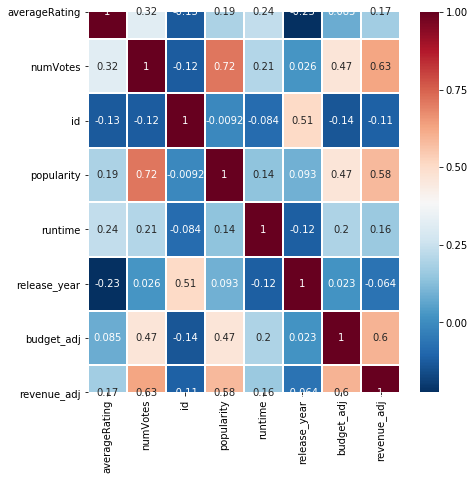

In [68]:
plt.figure(figsize=(7, 7))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

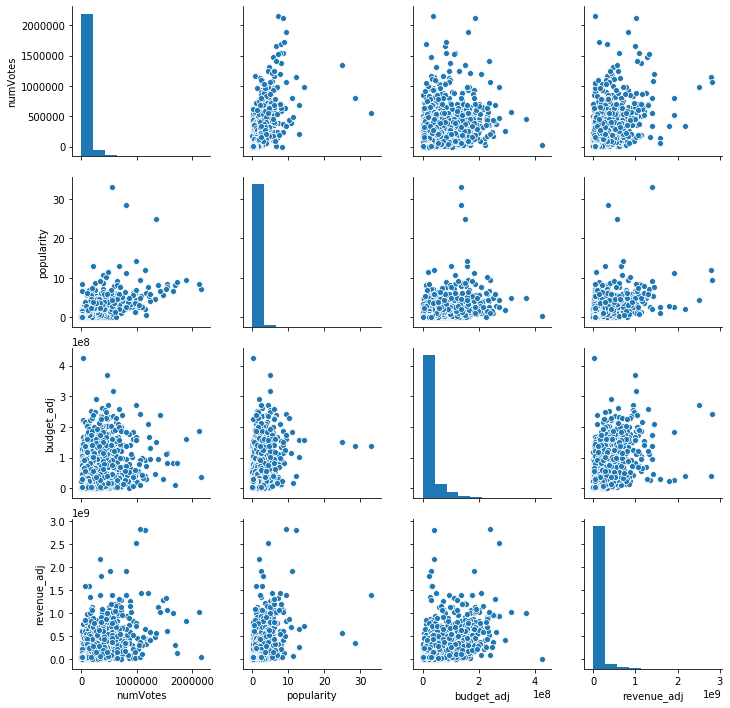

In [69]:
df_plot = data[['numVotes', 'popularity', 'budget_adj', 'revenue_adj']]
sns.pairplot(df_plot)

The features that have the biggest positive correlation with revenue_adj are numVotes, popularity, budget_adj.

## 4. Machine Learning

> <b>1.</b> Choosing the appropriate score in order to estimate the efficiency of the model. In our case we choose r2_score.  

> <b>2.</b> Choosing the models we want to fit
> - Ridge reggresion: shrinks the coefficients and it helps to reduce the model complexity;
<br>
<br>
> - DecisionTreeRegressor: observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output;
<br>
<br>
> - RandomForestRegressor: algorithm based on making decision trees using random sample and random features.


> <b>3.</b> Select relevant features on which the model has the best score. Train the best model, estimate the results.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [71]:
# Let's finally choose features and split data into train and test part
# First, we want to be sure that we estimated the most valuable features correctly:
# we will test different combination of features with Ridge regression

x1 = pd.DataFrame(data['numVotes'])
x2 = data[['numVotes','popularity']]
x3 = data[['numVotes','popularity', 'budget_adj']]
x4 = data[['numVotes','popularity', 'budget_adj','runtime']]
x5 = data[['numVotes','popularity', 'budget_adj','runtime','averageRating']]

y = data['revenue_adj']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1, y, test_size = 0.2,random_state = 42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y, test_size = 0.2,random_state = 42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x3, y, test_size = 0.2,random_state = 42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(x4, y, test_size = 0.2,random_state = 42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(x5, y, test_size = 0.2,random_state = 42)

In [72]:
# creating pipelines with model and StandardScaler for normalizing the data

pipeline_1 = make_pipeline(StandardScaler(), Ridge()).fit(X_train_1, y_train_1)
pipeline_2 = make_pipeline(StandardScaler(), Ridge()).fit(X_train_2, y_train_2)
pipeline_3 = make_pipeline(StandardScaler(), Ridge()).fit(X_train_3, y_train_3)
pipeline_4 = make_pipeline(StandardScaler(), Ridge()).fit(X_train_4, y_train_4)
pipeline_5 = make_pipeline(StandardScaler(), Ridge()).fit(X_train_5, y_train_5)

In [73]:
# choosing the list of peremeters for training Ridge regression
alp =list(10**i for i in range(-6,7))
parameters = {'ridge__alpha': alp}
score = 'r2'

In [74]:
Grid_1 = GridSearchCV(pipeline_1, parameters, cv=5, scoring=score, refit = True).fit(X_train_1, y_train_1)
print('Best parameters :', Grid_1.best_params_,'\n')

y_pred_1 = pipeline_1.predict(X_test_1)
print("r2_score is", r2_score( y_test_1, y_pred_1))

Best parameters : {'ridge__alpha': 100} 

r2_score is 0.4927398449500937


In [75]:
Grid_2 = GridSearchCV(pipeline_2, parameters, cv=5, scoring=score, refit = True).fit(X_train_2, y_train_2)
print('Best parameters :', Grid_2.best_params_,'\n')

y_pred_2 = pipeline_2.predict(X_test_2)
print("r2_score is", r2_score(y_test_2, y_pred_2))

Best parameters : {'ridge__alpha': 100} 

r2_score is 0.5466646785302356


In [76]:
Grid_3 = GridSearchCV(pipeline_3, parameters, cv=5, scoring=score, refit = True).fit(X_train_3, y_train_3)
print('Best parameters :', Grid_3.best_params_,'\n')

y_pred_3 = pipeline_3.predict(X_test_3)
print("r2_score is", r2_score(y_test_3,y_pred_3))

Best parameters : {'ridge__alpha': 100} 

r2_score is 0.6431816770011823


In [77]:
Grid_4 = GridSearchCV(pipeline_4, parameters, cv=5, scoring=score, refit = True).fit(X_train_4, y_train_4)
print('Best parameters :', Grid_4.best_params_,'\n')

y_pred_4 = pipeline_4.predict(X_test_4)
print("r2_score is", r2_score(y_test_4, y_pred_4))

Best parameters : {'ridge__alpha': 100} 

r2_score is 0.6431652005039652


In [78]:
Grid_5 = GridSearchCV(pipeline_5, parameters, cv=5, scoring=score, refit = True).fit(X_train_5, y_train_5)
print('Best parameters :', Grid_5.best_params_,'\n')

y_pred_5 = pipeline_5.predict(X_test_5)
print("r2_score is", r2_score(y_test_5, y_pred_5))

Best parameters : {'ridge__alpha': 100} 

r2_score is 0.6430700348187119


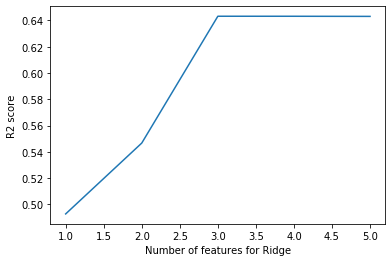

In [79]:
# Let's plot how score depends on the number of features for Ridge
y_list=[r2_score(y_test_1, y_pred_1),r2_score(y_test_2, y_pred_2),r2_score(y_test_3, y_pred_3),r2_score(y_test_4, y_pred_4),r2_score(y_test_5, y_pred_5)]
plt.plot(range(1,6),y_list)
plt.xlabel('Number of features for Ridge')
plt.ylabel('R2 score')
plt.show()

As we can see the score didn't do higher since we have 3 features. So let's use them for DecisionTreeRegressor and RandomForestRegressor.

In [80]:
# Perform DecisionTreeRegressor
pipeline_dt = make_pipeline(StandardScaler(), DecisionTreeRegressor()).fit(X_train_3, y_train_3)

Depth_list = range(1, 10)
parameters_dt = {'decisiontreeregressor__max_depth': Depth_list}

Grid_dt = GridSearchCV(pipeline_dt, parameters_dt, cv=5, scoring = score).fit(X_train_3, y_train_3)
print('Best parameters: ',Grid_dt.best_params_)

best = Grid_dt.best_estimator_.fit(X_train_3, y_train_3)
y_pred_3 = best.predict(X_test_3)
print(r2_score(y_test_3, y_pred_3))

Best parameters:  {'decisiontreeregressor__max_depth': 5}
0.5565273452860602


In [81]:
# Perform RandomForestRegressor
pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor()).fit(X_train_3, y_train_3)

Depth_list = range(1, 10)
parameters_rf = {'randomforestregressor__max_depth': Depth_list,'randomforestregressor__n_estimators': range(1, 20)}

Grid_rf = GridSearchCV(pipeline_rf, parameters_rf, scoring = score, cv=5, n_jobs=-1).fit(X_train_3, y_train_3)
print('Best parameters: ',Grid_rf.best_params_)

best = Grid_rf.best_estimator_.fit(X_train_3, y_train_3)
y_pred_3 = best.predict(X_test_3)
print(r2_score(y_test_3, y_pred_3))

C:\Users\gaziz\AppData\Local\Continuum\anaconda3\envs\scientificcomp\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best parameters:  {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 16}
0.6442237574928276


## Conclusion

As we mentioned before, the task of the great importance is to predict revenue for the particular movie. Moreover, to find the crucial for the movie outcome features, which will play a big role in the future production. So, based on data from IMDb and TMDb, we gained the following results:
> <b>1.</b> Top 3 features that have the biggest positive correlation with revenue are the number of people who voted on IMDb website, popularity of the movie and budget.

> <b>2.</b> Top actors, top directors and the most popular genres don't affect the revenue so much. We showed examples in preprocessing part that approved this statement. 
<br>
<br>
> <b>3.</b> Rating has influence on income, but it's not on top 3 features.

> <b>4.</b> All three models that we used(Ridge, DecisionTreeRegression, RandomForestRegression) showed approximately the same results based on R2_score. But elaborating on data showed us, that there are lot's of missed data in the dataset, especially revenue_adj and budget_adj(they are equal to zero), so we replaced them by median. 
<br>
<br>

To sum up, we would like to say that machine learning could play a significant role for work of producers and filmmakers for exploratory analysis of income. But it's more esssential for the big companies, not for festival movies. It would be great to estimate the key features of these two groups to find if there have something in common. And would mass market films change its direction to more art house movies?